# IMPORT LIBRARIES

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# LOAD AND PREPROCESS DATA

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["id", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the 'id' column
data = data.drop(columns=["id"])

# Convert diagnosis to binary values (M = 1, B = 0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Display the first few rows of the dataset
print(data.head())

   diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1      17.99      10.38     122.80     1001.0    0.11840   
1          1      20.57      17.77     132.90     1326.0    0.08474   
2          1      19.69      21.25     130.00     1203.0    0.10960   
3          1      11.42      20.38      77.58      386.1    0.14250   
4          1      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  feature_9  ...  feature_21  feature_22  \
0    0.27760     0.3001    0.14710     0.2419  ...       25.38       17.33   
1    0.07864     0.0869    0.07017     0.1812  ...       24.99       23.41   
2    0.15990     0.1974    0.12790     0.2069  ...       23.57       25.53   
3    0.28390     0.2414    0.10520     0.2597  ...       14.91       26.50   
4    0.13280     0.1980    0.10430     0.1809  ...       22.54       16.67   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0      184.60      2019.0  

# OUTLIER DETECTION

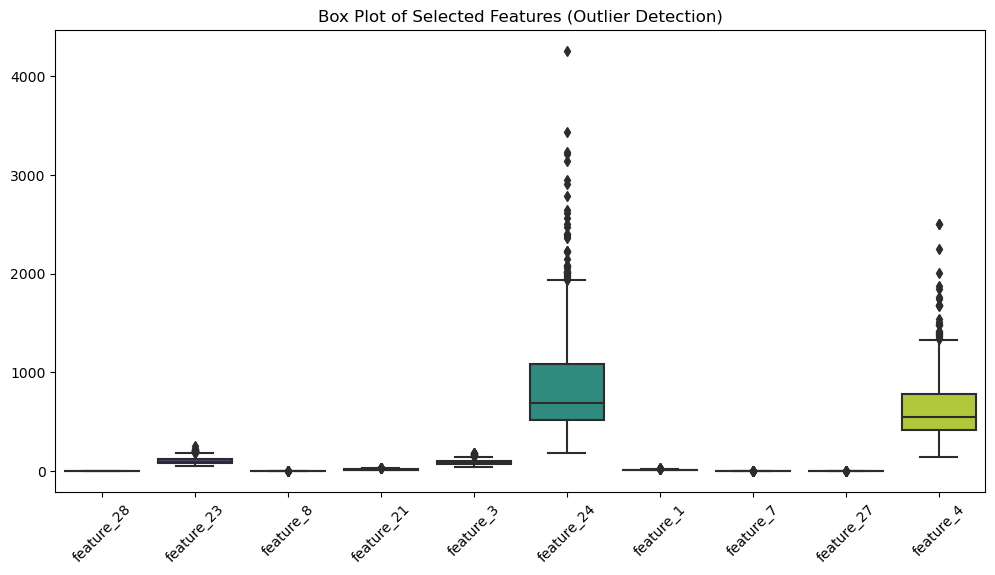

In [3]:
features_to_plot = ["feature_28", "feature_23", "feature_8","feature_21", "feature_3","feature_24", "feature_1", "feature_7","feature_27", "feature_4"]
# Plot box plots for a few features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[features_to_plot], palette="viridis")
plt.title("Box Plot of Selected Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

# IQR OUTIER

In [14]:
# Calculate IQR for all features
Q1 = data.drop(columns=["diagnosis"]).quantile(0.25)
Q3 = data.drop(columns=["diagnosis"]).quantile(0.75)
IQR = Q3 - Q1

# Define outliers as data points outside 1.5 * IQR
outliers_iqr = ((data.drop(columns=["diagnosis"]) < (Q1 - 1.5 * IQR)) | (data.drop(columns=["diagnosis"]) > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers detected (IQR method): {outliers_iqr.sum()}")

Number of outliers detected (IQR method): 144


# REMOVE OUTLIER

In [15]:
# Remove outliers based on IQR
data_cleaned = data[~outliers_iqr]

# Compare dataset sizes
print(f"Original dataset size: {data.shape}")
print(f"Shape of dataset after removing outliers (IQR): {data_cleaned.shape}")

Original dataset size: (495, 31)
Shape of dataset after removing outliers (IQR): (351, 31)


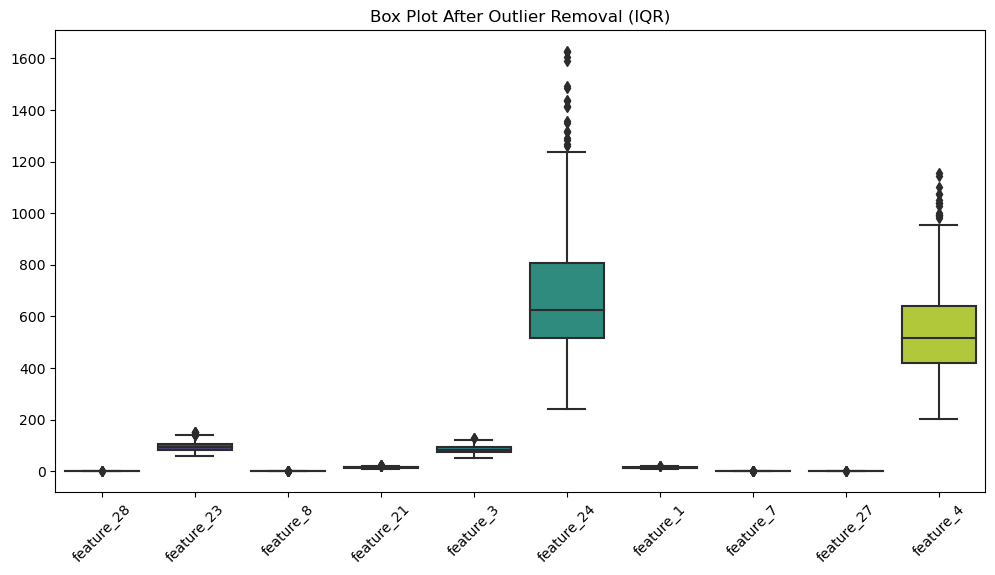

In [16]:
# Plot box plots after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[features_to_plot], palette="viridis")
plt.title("Box Plot After Outlier Removal (IQR)")
plt.xticks(rotation=45)
plt.show()

# TRAIN MODEL

In [17]:
# Split the data into features (X) and target (y)
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]


In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the SVM classifier
svm_model = SVC(kernel="linear", random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# EVALUATE MODEL

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        61
           1       0.94      0.89      0.92        38

    accuracy                           0.94        99
   macro avg       0.94      0.93      0.94        99
weighted avg       0.94      0.94      0.94        99



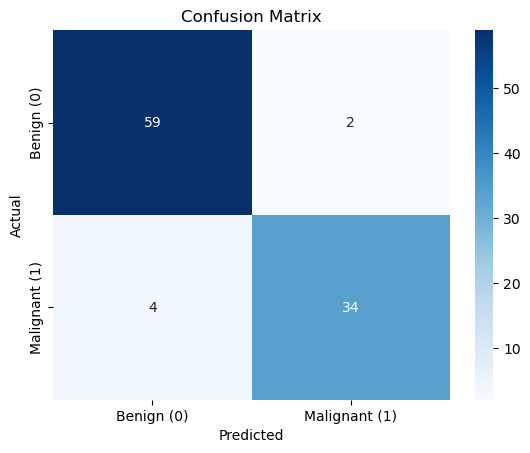

In [19]:
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Why Use PCA?
- Dimensionality Reduction: Reduces the number of features while retaining most of the information.

- Visualization: Makes it easier to visualize high-dimensional data in 2D or 3D.

- Noise Reduction: Removes noise and irrelevant features, improving model performance.

# PCA

In [25]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["diagnosis"] = y  # Add the target column for visualization

# VISUALIZE PCA

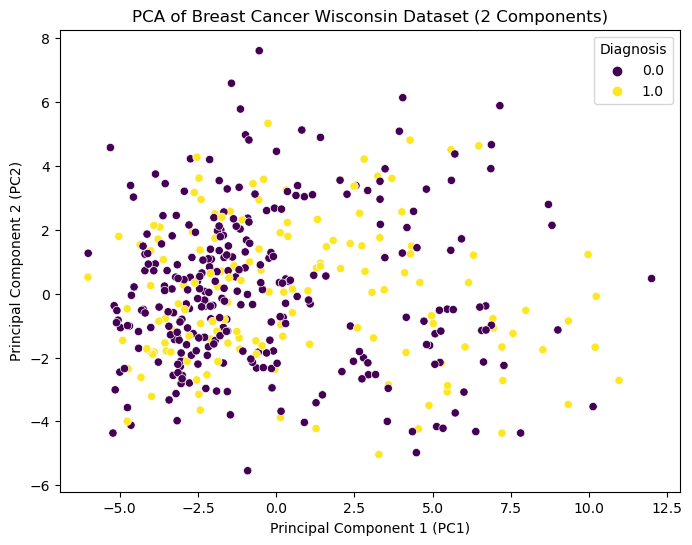

In [26]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="diagnosis", data=pca_df, palette="viridis")
plt.title("PCA of Breast Cancer Wisconsin Dataset (2 Components)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Diagnosis", loc="best")
plt.show()

# EXPLAINED VARIANCE RATIO

Explained variance ratio: [0.45621514 0.17396507]


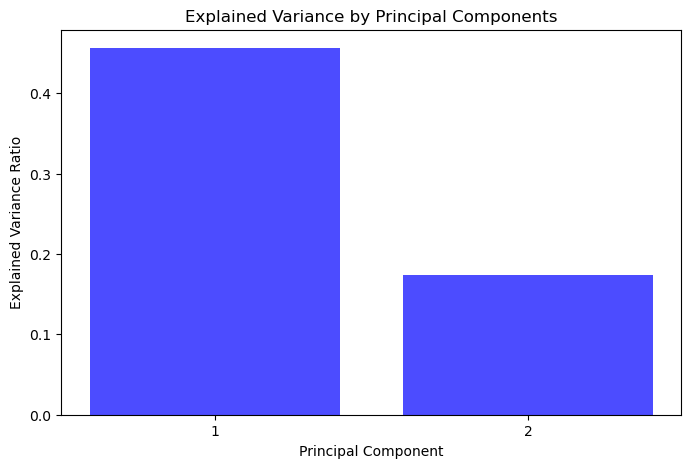

In [27]:
# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance, alpha=0.7, align='center', color='blue')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.xticks(range(1, 3))
plt.show()